# Convnet from Scratch
In diesem Notebook erstellen wir ein convolutional neural network von der Grundbasis aus auf einem kleinen Datasatz.
In diesem Beispiel nutzen wir den Datensatz von Katzen und Hunden von Kaggle https://www.kaggle.com/competitions/dogs-vs-cats/data.
Bitte ladet euch den Training Datensatz herunter.

## Loading Packages

In [1]:
import os, shutil

import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

## Data Preparation

In [2]:
original_dataset_dir = r'C:\Users\michi\OneDrive\MSC DV\Python\Deep Learning\dogs-vs-cats\train'

base_dir = r'C:\Users\michi\OneDrive\MSC DV\Python\Deep Learning\cats_dogs_small'
#os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)


## Control of the data

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dogs images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dogs images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dogs images: 1000
total validation cat images: 500
total validation dogs images: 500
total test cat images: 500
total test dogs images: 500


## Data Gathering with Generator
To import pictures into python for computer vision, the following steps need to be done:
1. Read the picture files
2. Decode teh JPEG content to RGB grids of pixels
3. Convert these into floating point tensors
4. Rescale the pixel values (between 0 and 255) to the [0,1] interval

All these step are automated by the `ImageDataGenerator` function in the `keras.preprocessing.image` module.

In [4]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Look at the output of oune of these generators.

In [5]:
for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data_batch shape: (20, 150, 150, 3)
labels batch shape (20,)


## Modeling (Aufgabe 2)
Nun sollen Sie ein Modell für diese Daten bauen.

In [0]:
#Convolutional Layers Max-Pooling
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 40s 390ms/step - loss: 0.7976 - accuracy: 0.5355 - val_loss: 0.6867 - val_accuracy: 0.5510
Epoch 2/10
100/100 [==============================] - 40s 397ms/step - loss: 0.6686 - accuracy: 0.5985 - val_loss: 0.6178 - val_accuracy: 0.6610
Epoch 3/10
100/100 [==============================] - 41s 414ms/step - loss: 0.6073 - accuracy: 0.6755 - val_loss: 0.8619 - val_accuracy: 0.5480
Epoch 4/10
100/100 [==============================] - 40s 404ms/step - loss: 0.5537 - accuracy: 0.7150 - val_loss: 0.5373 - val_accuracy: 0.7100
Epoch 5/10
100/100 [==============================] - 40s 405ms/step - loss: 0.4878 - accuracy: 0.7695 - val_loss: 0.5299 - val_accuracy: 0.7340
Epoch 6/10
100/100 [==============================] - 44s 436ms/step - loss: 0.4371 - accuracy: 0.7905 - val_loss: 0.6084 - val_accuracy: 0.7230
Epoch 7/10
100/100 [==============================] - 41s 407ms/step - loss: 0.3638 - accuracy: 0.8385 - val_loss: 0.5608 - val_ac

In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Test accuracy:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 4s 72ms/step - loss: 0.9929 - accuracy: 0.6870
Test accuracy: 0.6869999766349792


Epoch 1/10
100/100 [==============================] - 42s 419ms/step - loss: 0.0688 - accuracy: 0.9765 - val_loss: 1.0807 - val_accuracy: 0.6980
Epoch 2/10
100/100 [==============================] - 39s 385ms/step - loss: 0.0740 - accuracy: 0.9790 - val_loss: 1.4307 - val_accuracy: 0.7310
Epoch 3/10
100/100 [==============================] - 39s 393ms/step - loss: 0.0515 - accuracy: 0.9845 - val_loss: 1.3794 - val_accuracy: 0.7110
Epoch 4/10
100/100 [==============================] - 39s 388ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 1.7769 - val_accuracy: 0.7170
Epoch 5/10
100/100 [==============================] - 39s 393ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 1.3664 - val_accuracy: 0.7300
Epoch 6/10
100/100 [==============================] - 38s 376ms/step - loss: 0.0326 - accuracy: 0.9910 - val_loss: 1.5140 - val_accuracy: 0.7360
Epoch 7/10
100/100 [==============================] - 38s 382ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 1.8385 - val_ac

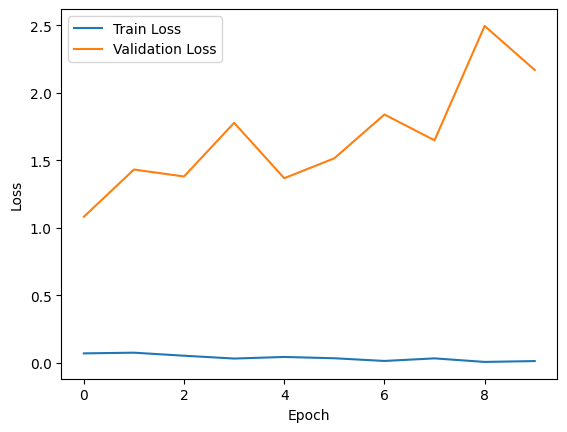

In [9]:
#Verlustfunktion
history = model.fit(train_generator, steps_per_epoch=100, epochs=10, validation_data=validation_generator, validation_steps=50)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

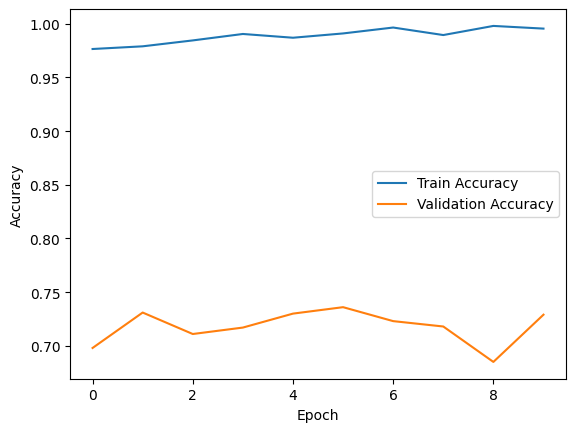

In [10]:
#Metrik
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=10, validation_data=validation_generator, validation_steps=50)

test_loss, test_accuracy = model.evaluate(test_generator, steps=50)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
100/100 [==============================] - 38s 383ms/step - loss: 0.0221 - accuracy: 0.9950 - val_loss: 2.0662 - val_accuracy: 0.7240
Epoch 2/10
100/100 [==============================] - 37s 366ms/step - loss: 0.0595 - accuracy: 0.9940 - val_loss: 2.1391 - val_accuracy: 0.7310
Epoch 3/10
100/100 [==============================] - 36s 363ms/step - loss: 9.0897e-04 - accuracy: 1.0000 - val_loss: 2.8032 - val_accuracy: 0.7170
Epoch 4/10
100/100 [==============================] - 36s 365ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 2.3802 - val_accuracy: 0.7200
Epoch 5/10
100/100 [==============================] - 36s 365ms/step - loss: 0.0096 - accuracy: 0.9980 - val_loss: 2.4739 - val_accuracy: 0.7250
Epoch 6/10
100/100 [==============================] - 36s 363ms/step - loss: 0.0489 - accuracy: 0.9910 - val_loss: 2.2021 - val_accuracy: 0.7120
Epoch 7/10
100/100 [==============================] - 37s 373ms/step - loss: 4.8995e-04 - accuracy: 1.0000 - val_loss: 2.5496 